In [1]:
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_boundary(model, X, Y, target, xlabel, ylabel):
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])
    plt.figure(figsize=(5, 5))
    if model:
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        plt.contour(XX, YY, pred, colors="gray") 
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


###手順
データの用意

データを分ける

モデルに学習させる

テストデータでテストする

分類の状態を描画する



また、kernel="liner"で線形分類、"rbf"で非線形分類を行えます。

正解率: 89.60000000000001 %


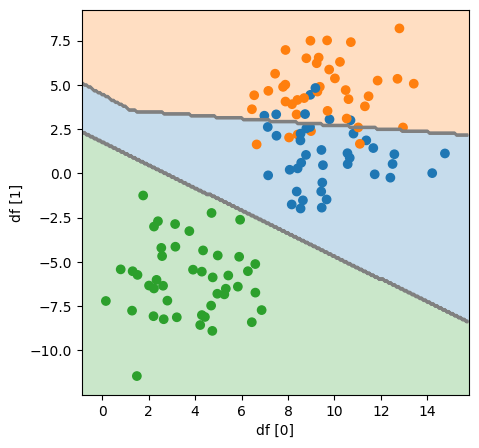

In [2]:
#ランダム番号4、特徴量は2つ、塊数は3、ばらつき2、500個のデータセットを作る
X, y = make_blobs(
    random_state=4,
    n_features=2,
    centers=3,
    cluster_std=2,
    n_samples=500) 

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

# 線形のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")

3つに分類できました！

次は非線形分類を使ってみましょう。gamma=1にして試してみましょう

正解率: 85.6 %


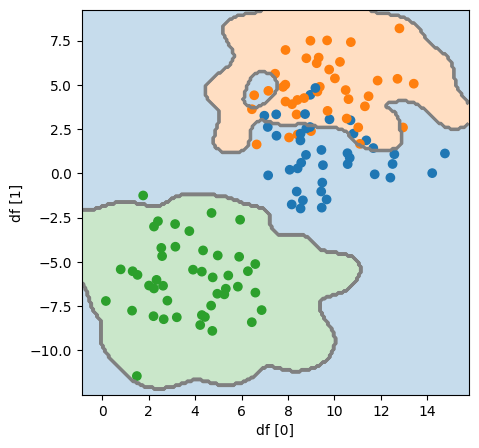

In [3]:
# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma=1)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")

非線形な境界線になりました。


gammaのパラメータの数値を大きくすると境界線が複雑に、小さくすると単純に調整できます！


次はgamma=10試してみましょう。

正解率: 72.8 %


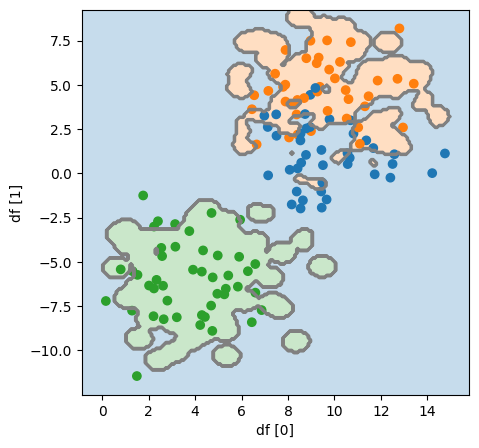

In [4]:
# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma=10)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")

境界線がかなり複雑になりました。

境界線が個々のデータの影響を受けすぎています。

次はgamma=0.1で試してみましょう。

正解率: 89.60000000000001 %


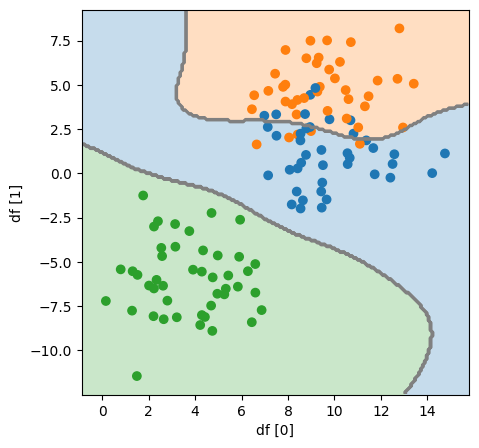

In [5]:
# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma=0.1)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")

###課題
☆データの個数やばらつきから自動的に決めてくれるscaleにしてみましょう。

下のコードは上と同じコードのままなので、いろいろいじって比べてみてください。

正解率: 85.6 %


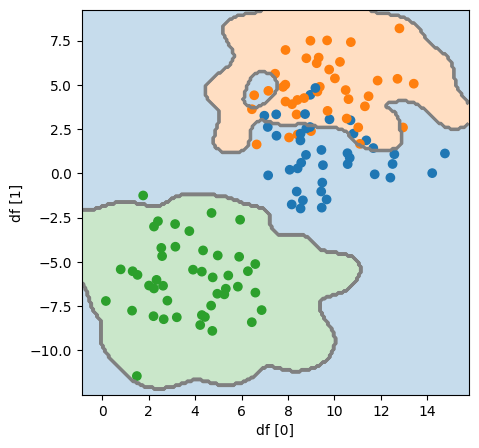

In [6]:
# ガウスカーネル法のSVMで学習モデルを作る（訓練データで）
model = svm.SVC(kernel="rbf", gamma=1)
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の様子を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")